In [32]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [6]:
california_csv = "dirty_data/RealEstate_California.csv"
georgia_csv = "dirty_data/RealEstate_Georgia.csv"

california_raw_data = pd.read_csv(california_csv)
georgia_raw_data = pd.read_csv(georgia_csv)

pd.options.display.max_columns = None

In [7]:
georgia_raw_data

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,currency,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,31503-110785431,16,17,55064,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,169900.0,74.0,Waycross,GA,1985,103 Hog Creek Rd,31503.0,-82.232475,31.200703,0,"""Looking for life in the country? Well look n...",USD,2302.0,2302.0,Acres,3.0,4.0,0.0,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,1,31503-76611082,16,18,55064,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,159000.0,56.0,Waycross,GA,1910,605 Ware St,31503.0,-82.365105,31.213835,0,"""Take a step back in time with this beautiful ...",USD,2864.0,2864.0,sqft,2.0,4.0,0.0,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2,31503-93126153,16,19,55064,USA,2021-07-10,0,0,Listed for sale,1.625875e+12,45000.0,62.0,Waycross,GA,1945,1961 Mount Pleasant Rd,31503.0,-82.327118,31.210838,0,This may be the investment property for you! ...,USD,728.0,728.0,Acres,1.0,1.0,0.0,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,3,31503-110785598,16,20,55064,USA,2021-07-09,0,0,Listed for sale,1.625789e+12,165000.0,102.0,Waycross,GA,1971,39 Joyce Rd,31503.0,-82.231300,31.169851,0,"""This one-owner ranch-style home has a new A/C...",USD,1620.0,1620.0,Acres,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
4,4,31503-2101070583,16,21,55064,USA,2021-07-06,0,0,Listed for sale,1.625530e+12,128593.0,0.0,Waycross,GA,0,0 Swamp Rd,31503.0,-82.405525,31.045984,0,The majority of this 99-acre tract is high and...,USD,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Ware County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,13799,30054-69864676,16,128670,8877,USA,2021-06-25,0,0,Listing removed,1.625875e+12,55000.0,0.0,Oxford,GA,0,45 Rainey Ridge Dr,30054.0,-83.918587,33.705410,0,Beautiful Lot in Twin Haynes Creek Subdivision...,USD,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Newton County
13800,13800,30054-69860763,16,128671,8877,USA,2021-06-25,0,0,Listing removed,1.625875e+12,47000.0,0.0,Oxford,GA,0,30 Clear Spring Ct,30054.0,-83.873894,33.685486,0,1 acre cul-de-sac lot located in Northwood sub...,USD,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Newton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,1.625789e+12,350000.0,131.0,Oxford,GA,2002,305 Haygood Ave,30054.0,-83.869751,33.613735,0,"""Spacious family home w/ mother-in-law suite -...",USD,2665.0,2665.0,Acres,4.0,5.0,2665.0,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,1.625875e+12,379000.0,193.0,Oxford,GA,2000,60 Pecan Ln,30054.0,-83.882889,33.669861,0,3/3 Ranch with oversized bonus room. Can choos...,USD,1960.0,1960.0,Acres,3.0,3.0,1960.0,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [8]:
georgia_raw_data.columns

Index(['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country',
       'datePostedString', 'is_bankOwned', 'is_forAuction', 'event', 'time',
       'price', 'pricePerSquareFoot', 'city', 'state', 'yearBuilt',
       'streetAddress', 'zipcode', 'longitude', 'latitude', 'hasBadGeocode',
       'description', 'currency', 'livingArea', 'livingAreaValue',
       'lotAreaUnits', 'bathrooms', 'bedrooms', 'buildingArea', 'parking',
       'garageSpaces', 'hasGarage', 'levels', 'pool', 'spa',
       'isNewConstruction', 'hasPetsAllowed', 'homeType', 'county'],
      dtype='object')

In [9]:
# Split column "datePostedString" into three new columns: "posted_year", "posted_month", "posted_day"

georgia_raw_data[["posted_year","posted_month","posted_day"]] = georgia_raw_data['datePostedString'].str.split("-", expand = True)

In [10]:
# Dropped all LOTS from the data
# Dropped all year built of "0" from the data
# Dropped all year built of "999" from the data

georgia_homes = georgia_raw_data.loc[georgia_raw_data["homeType"]!= "LOT"]
georgia_homes_1 = georgia_homes.loc[georgia_raw_data["yearBuilt"]!= 0]
georgia_homes_2 = georgia_homes_1.loc[georgia_raw_data["yearBuilt"]!= 9999]
georgia_homes_3 = georgia_homes_2.loc[georgia_raw_data["price"]!= 0]
georgia_homes_4 = georgia_homes_3.loc[georgia_raw_data["pricePerSquareFoot"]!= 0]
georgia_homes_5 = georgia_homes_4.loc[georgia_raw_data["price"] >= 100000]
georgia_homes_6 = georgia_homes_5.loc[georgia_raw_data["pricePerSquareFoot"] >= 75]
georgia_homes_7 = georgia_homes_6.loc[georgia_raw_data["livingArea"] != 1]
georgia_homes_8 = georgia_homes_7.loc[georgia_raw_data["bathrooms"] != 0]
georgia_homes_9 = georgia_homes_8.loc[georgia_raw_data["bedrooms"] != 0]



In [11]:
georgia_homes_9.describe()

,Unnamed: 0,stateId,countyId,cityId,is_bankOwned,is_forAuction,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,latitude,hasBadGeocode,livingArea,livingAreaValue,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,7298.000000,7298.0,7298.000000,7298.000000,7298.0,7298.0,7.298000e+03,7.298000e+03,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.0,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000,7298.000000
mean,6924.217868,16.0,140448.670047,35646.807344,0.0,0.0,1.623205e+12,4.590797e+05,181.396958,1986.066320,30559.829405,-83.870846,33.478297,0.0,2518.339271,2518.339271,2.988353,3.612908,2083.279666,0.747465,0.882708,0.601946,0.092765,0.106193,0.067553,0.005755
std,4041.792284,0.0,97600.263347,47399.233460,0.0,0.0,2.001379e+10,4.865193e+05,103.030331,29.005134,532.799151,1.026339,0.944686,0.0,1512.903975,1512.903975,1.331871,1.134957,1737.140516,0.434496,1.102130,0.489530,0.290123,0.308106,0.250994,0.075648
min,3.000000,16.0,20.000000,0.000000,0.0,0.0,1.107475e+12,1.000000e+05,75.000000,1790.000000,30002.000000,-85.574303,30.663897,0.0,314.000000,314.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3407.250000,16.0,55344.250000,15510.000000,0.0,0.0,1.624666e+12,2.379250e+05,122.000000,1971.000000,30126.000000,-84.464577,33.265261,0.0,1524.250000,1524.250000,2.000000,3.000000,1118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7006.500000,16.0,114800.500000,31894.000000,0.0,0.0,1.625616e+12,3.400000e+05,156.000000,1994.000000,30331.000000,-84.216896,33.785782,0.0,2128.000000,2128.000000,3.000000,3.000000,1845.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,10497.750000,16.0,227444.500000,44821.000000,0.0,0.0,1.625789e+12,5.000000e+05,207.000000,2006.000000,30809.000000,-83.621931,34.012451,0.0,3024.000000,3024.000000,4.000000,4.000000,2842.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,13803.000000,16.0,333687.000000,397383.000000,0.0,0.0,1.626221e+12,1.000000e+07,2092.000000,2022.000000,31909.000000,-80.841385,34.993488,0.0,17151.000000,17151.000000,16.000000,21.000000,15759.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
georgia_homes_sale = georgia_homes_9.loc[georgia_homes_9["event"]== "Listed for sale"]
georgia_forsale = georgia_homes_sale.drop_duplicates(subset = ["id"], keep = 'first')

In [13]:
finalized_georgia_data = georgia_forsale[["id",
                           "streetAddress",
                           "city",
                           "state",
                           "zipcode",
                           "longitude",
                           "latitude",
                           "yearBuilt",
                           "isNewConstruction",
                           "posted_year",
                           "posted_month",
                           "price",
                           "pricePerSquareFoot",
                           "bedrooms",
                           "bathrooms",
                           "pool",
                           "spa",
                           "description"]]
finalized_georgia_data

,id,streetAddress,city,state,zipcode,longitude,latitude,yearBuilt,isNewConstruction,posted_year,posted_month,price,pricePerSquareFoot,bedrooms,bathrooms,pool,spa,description
3,31503-110785598,39 Joyce Rd,Waycross,GA,31503.0,-82.231300,31.169851,1971,0,2021,07,165000.0,102.0,2.0,2.0,0,0,"""This one-owner ranch-style home has a new A/C..."
5,31503-227421330,3475 Lark Rdg,Waycross,GA,31503.0,-82.300858,31.217014,1980,0,2021,07,173500.0,115.0,3.0,2.0,0,0,"""Heres a nice home on large lot featuring 3 be..."
6,31503-110784307,178 Wynton Cir,Waycross,GA,31503.0,-82.282707,31.211992,1999,0,2021,07,349900.0,152.0,3.0,2.0,1,0,"""Dont miss out on this beautiful home that is ..."
9,31503-93124512,1801 Creswell St,Waycross,GA,31503.0,-82.361916,31.191181,1922,0,2021,07,159995.0,87.0,3.0,3.0,1,0,This is such a nice find. There are 2 homes on...
11,31503-76613202,1906 Hall St,Waycross,GA,31503.0,-82.366386,31.189428,2000,0,2021,06,199500.0,104.0,3.0,2.0,1,0,"""NIce and private yet not far from town - this..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13782,30054-69887711,80 Wildflower Trl,Oxford,GA,30054.0,-83.918167,33.702938,1999,0,2021,07,430000.0,104.0,4.0,4.0,0,1,Beautiful. Builders Custom Built Home. 4 Bedro...
13783,30054-69870028,139 Greenwood Cir,Oxford,GA,30054.0,-83.857208,33.666908,1973,0,2021,07,227000.0,116.0,3.0,3.0,0,0,"""Welcome to this one of a kind home tucked awa..."
13784,30054-69867027,115 Windsor Way,Oxford,GA,30054.0,-83.855103,33.638157,1986,0,2021,07,100000.0,93.0,3.0,2.0,0,0,Looking for home with a private backyard!! The...
13801,30054-69887935,305 Haygood Ave,Oxford,GA,30054.0,-83.869751,33.613735,2002,0,2021,06,350000.0,131.0,5.0,4.0,0,0,"""Spacious family home w/ mother-in-law suite -..."


In [25]:
# finalized_georgia_data.to_csv("clean_data/finalized_georgia_data.csv")

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


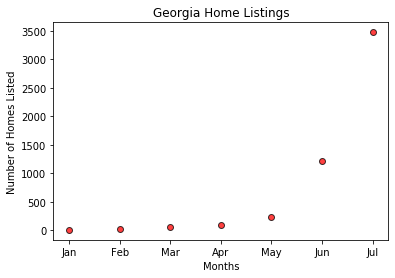

In [54]:
listing_bins = [0, 1, 2, 3, 4, 5, 6, 7]
listing_ranges = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]


georgia_listings = finalized_georgia_data[["id",
                           "posted_year",
                           "posted_month"]]
# georgia_listings.info()

georgia_listings["Listings"] = pd.cut(georgia_listings["posted_month"].astype(int), listing_bins, labels=listing_ranges, include_lowest=True)
georgia_listings = georgia_listings.groupby(["Listings"]).count()

georgia_listings.reset_index(inplace = True)

x_axis = georgia_listings["Listings"]
y_axis = georgia_listings["id"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Georgia Home Listings")
plt.xlabel("Months")
plt.ylabel("Number of Homes Listed")

plt.show()

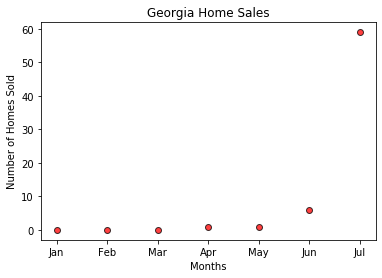

In [53]:
sold_bins = [0, 1, 2, 3, 4, 5, 6, 7]
sold_ranges = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]

georgia_sold = georgia_homes_9.loc[georgia_homes_9["event"]== "Sold"]

georgia_sold = georgia_sold[["id",
                           "posted_year",
                           "posted_month"]]
# georgia_sold.info()

georgia_sold["Listings"] = pd.cut(georgia_sold["posted_month"].astype(int), listing_bins, labels=listing_ranges, include_lowest=True)
georgia_sold = georgia_sold.groupby(["Listings"]).count()

georgia_sold.reset_index(inplace = True)

x_axis = georgia_sold["Listings"]
y_axis = georgia_sold["id"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Georgia Home Sales")
plt.xlabel("Months")
plt.ylabel("Number of Homes Sold")
plt.show()